In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [3]:
data=pd.read_csv('Cust_Spend_Data.csv')
data.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [4]:
data.tail()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [5]:
data.sample(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
2,3,C,7000,7,1,3,4
5,6,F,4000,3,0,1,8
9,10,J,1000,4,0,1,7
3,4,D,6500,5,1,1,4
0,1,A,10000,2,1,1,0
4,5,E,6000,6,0,12,3
7,8,H,2500,3,0,1,1
1,2,B,7000,3,0,10,9
6,7,G,2500,5,0,11,2
8,9,I,2000,2,0,2,2


In [6]:
data.dtypes

Cust_ID             int64
Name               object
Avg_Mthly_Spend     int64
No_Of_Visits        int64
Apparel_Items       int64
FnV_Items           int64
Staples_Items       int64
dtype: object

In [10]:
new_data=data.iloc[:,2:]

In [13]:
new_data_scaled=new_data.apply(zscore)

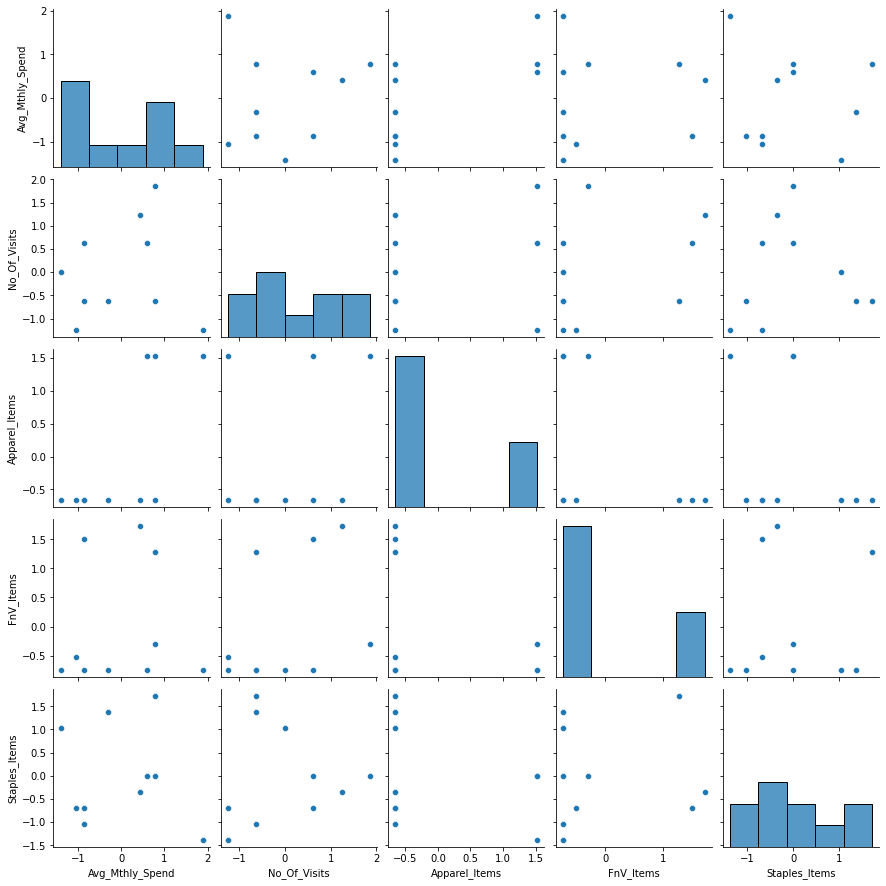

In [15]:
sns.pairplot(new_data_scaled)

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
agg=AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [21]:
agg.fit(new_data_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [23]:
val=agg.labels_

In [25]:
new_data['Labels']=val

In [31]:
results=new_data.groupby('Labels')
results.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
Labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


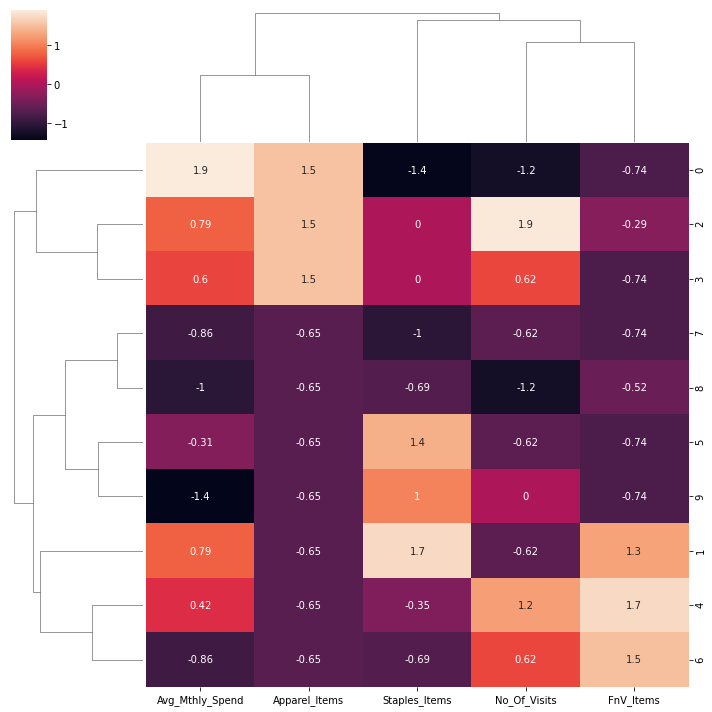

In [33]:
sns.clustermap(new_data_scaled,annot=True)

In [37]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage

In [40]:
from scipy.spatial.distance import pdist 

In [55]:
Z=linkage(new_data_scaled, method='average', metric='euclidean')
c,coph_dists=cophenet(Z,pdist(new_data_scaled))
c

0.8681149436293064

In [51]:
sns.set(rc={'figure.figsize':(15,10)})

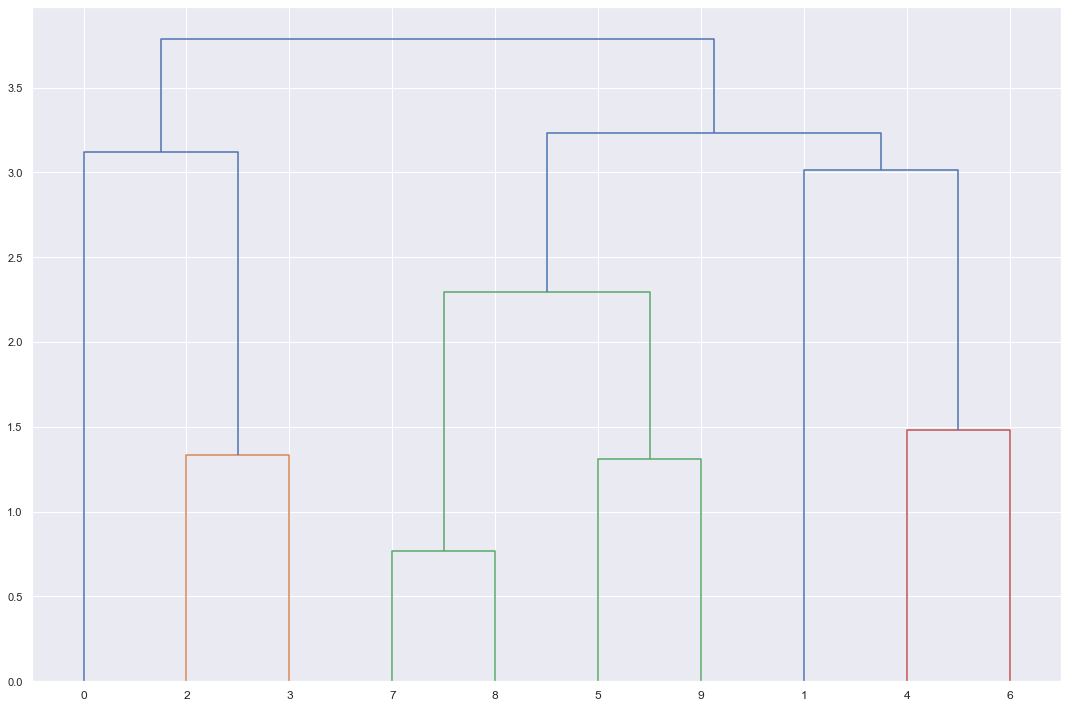

In [53]:
dendrogram(Z)
plt.tight_layout()

In [56]:
Z1=linkage(new_data_scaled,method='complete')
c,cop=cophenet(Z1,pdist(new_data_scaled))
c

0.8606955190809153

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

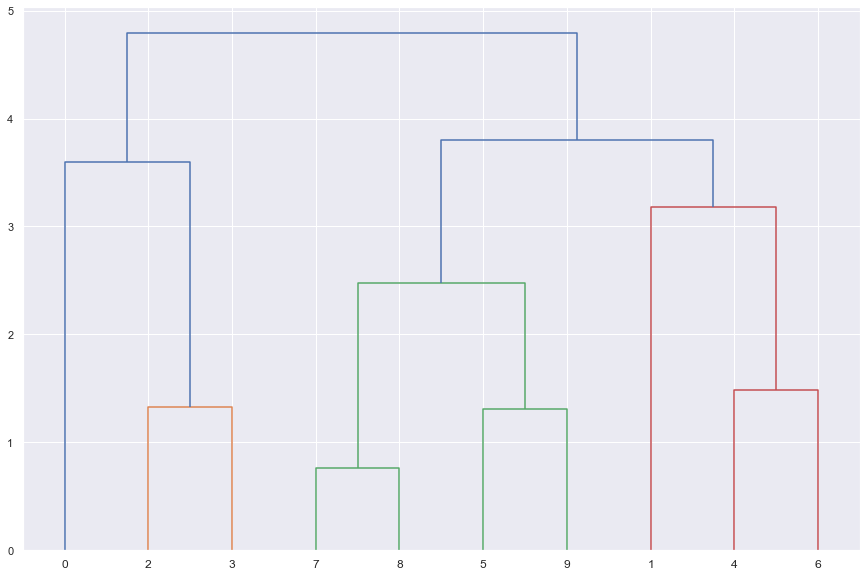

In [58]:
dendrogram(Z1)
plt.tight_layout

In [59]:
Z2=linkage(new_data_scaled,method='ward')
c,cop=cophenet(Z2,dist(new_data_scaled))

NameError: name 'dist' is not defined